In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from PIL import Image
import itertools
import random
import glob

In [ ]:
def LCFS(N_vertices, sequence, repetitions):
  G = nx.Graph()
  vertices = range(N_vertices)
  currentVertex = 0

  for v in vertices:
    G.add_node(v)
  for r in range(repetitions):
    for i in range(len(sequence)):
      if(sequence[i] != 0):
        target = (currentVertex + sequence[i])%N_vertices
        G.add_edge(currentVertex, vertices[target])
      currentVertex = (1 + currentVertex)% N_vertices

  return G

In [ ]:
#k7
g = LCFS(7,[1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3],1)

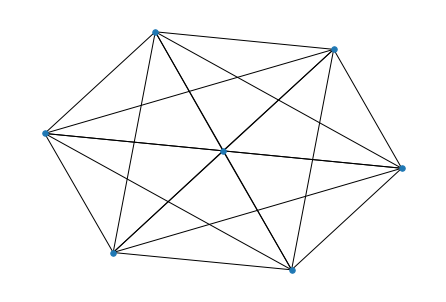

In [ ]:
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 1230),node_size=30)


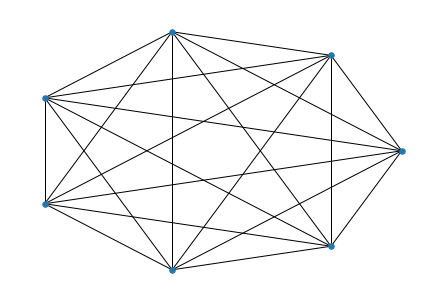

In [ ]:
nx.draw(g, nx.circular_layout(g),node_size=30)

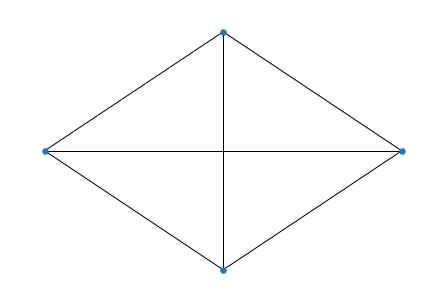

In [ ]:
#k4
g = LCFS(4,[1,1,1,1,2,2],1)
nx.draw(g, nx.circular_layout(g),node_size=30)


In [ ]:
#@title 3D Plot
layt = nx.spring_layout(g,iterations = 1350, dim=3)

#layt=g.layout('fr3d', dim=3)
N = g.number_of_nodes()
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in g.edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(50,125,250)', width=4),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='Articles',
               marker=dict(symbol='circle',
                             size=4,
                             color='rgb(50,110,250)',
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               #text=labels,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Graph",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest'
    ,paper_bgcolor='rgba(11,11,11,11)',
    plot_bgcolor='rgba(11,11,11,11)'    )

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
layt

{0: array([-0.69760844,  0.03069383, -0.81954118]),
 1: array([0.06472332, 0.42677469, 0.9870257 ]),
 2: array([-0.38985524,  1.        , -0.04965064]),
 3: array([ 0.78231863, -0.53067241,  0.51690368]),
 4: array([ 0.82842501,  0.49359333, -0.51009553]),
 5: array([ 0.21595218, -0.86138369, -0.60555409]),
 6: array([-0.80395546, -0.55900575,  0.48091205])}

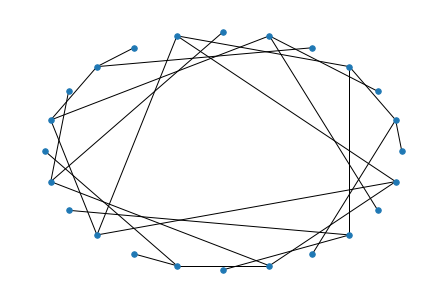

In [ ]:

g = LCFS(24,[1,2,3,4,5,6,7,8],3)
nx.draw(g, nx.circular_layout(g),node_size=30)


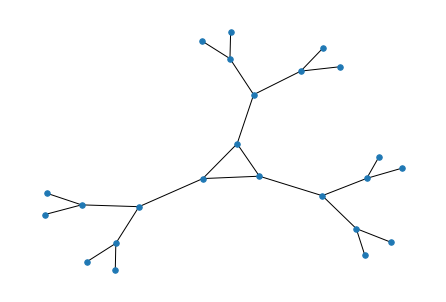

In [ ]:
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 230),node_size=30)


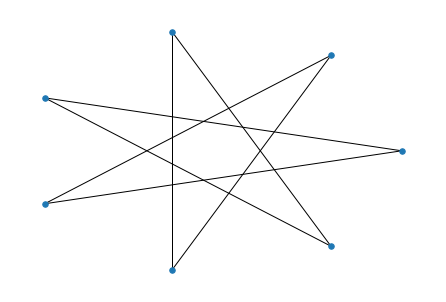

In [ ]:
v = 7
g = LCFS(v,[(v//2)+1],v)
nx.draw(g, nx.circular_layout(g),node_size=30)

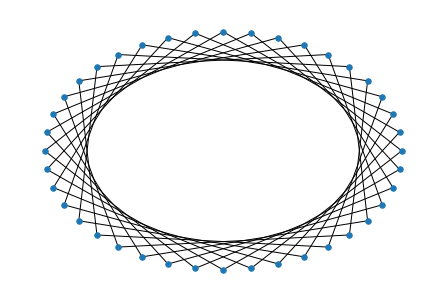

In [ ]:
v = 40
g = LCFS(v,[(v//5)+1],v)
nx.draw(g, nx.circular_layout(g),node_size=30)

In [ ]:
gs = []
vertices = 40
for i in range(1,40):
  gs.append(LCFS(vertices,[i],vertices))

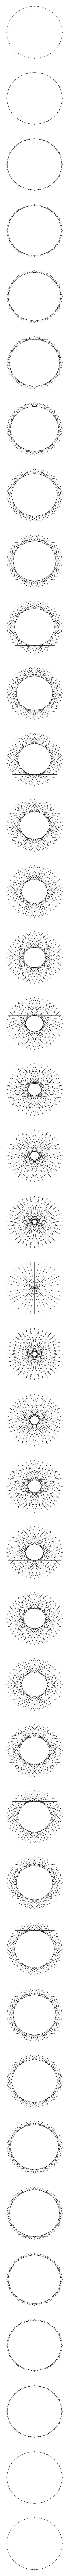

In [ ]:
fig, axs = plt.subplots(len(gs), figsize=(10, 10*len(gs)))

for i, ax_row in enumerate(axs):
  my_graph = gs[i]
  if hasattr(my_graph, 'is_directed'):
    nx.draw(my_graph, nx.circular_layout(my_graph), node_size=20, ax=ax_row)
  ax_row.set_xticks([])
  ax_row.set_yticks([])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig, axs = plt.subplots(len(gs), figsize=(10, 10))

for i, ax_row in enumerate(axs):
  my_graph = gs[i]
  if hasattr(my_graph, 'is_directed'):
    nx.draw(my_graph, nx.circular_layout(my_graph), node_size=20)
  plt.savefig("im"+str(i)+".png")
  plt.clf()

plt.subplots_adjust(wspace=0.05, hspace=0.05)

<Figure size 720x720 with 0 Axes>

In [ ]:
fp_in = "*.png"
fp_out = "image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
files = glob.glob(fp_in)
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

img, *imgs = [Image.open(f) for f in files]

img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=360, loop=0)

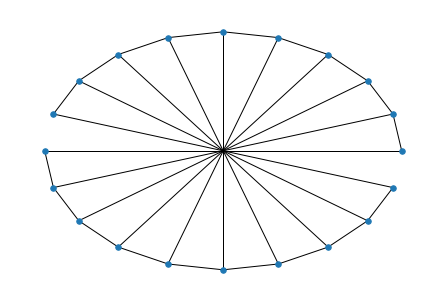

In [ ]:
g = LCFS(20,[1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,10,10,10,10,10,10,10,10,10,10,10],1)
nx.draw(g, nx.circular_layout(g),node_size=30)

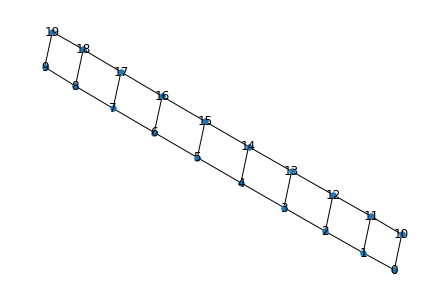

In [ ]:
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 430),node_size=30,with_labels=True)

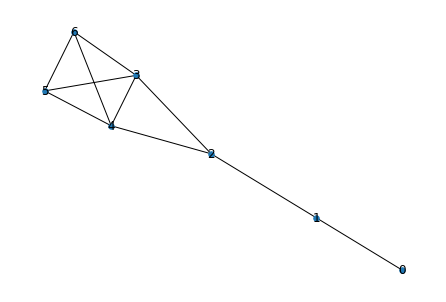

In [ ]:
g = LCFS(7,[1,1,1,1,1,1,0,  0,0,2,2,2,0,4],1)
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 430),node_size=30,with_labels=True)

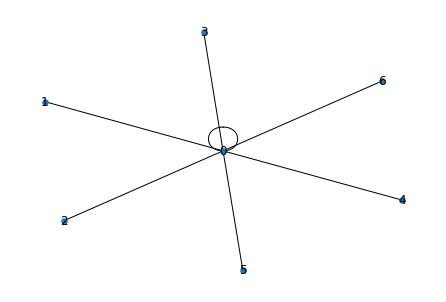

In [ ]:
g = LCFS(7,[7,6,5,4,3,2,1],1)
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 430),node_size=30,with_labels=True)

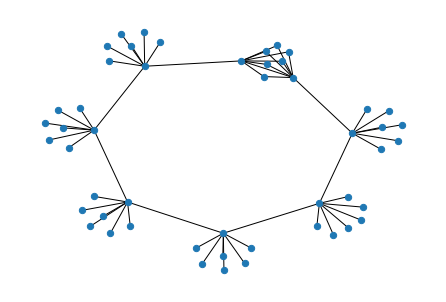

In [ ]:
g = LCFS(50,[7,6,5,4,3,2,1],8)
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 430),node_size=40,cmap=plt.cm.Blues)

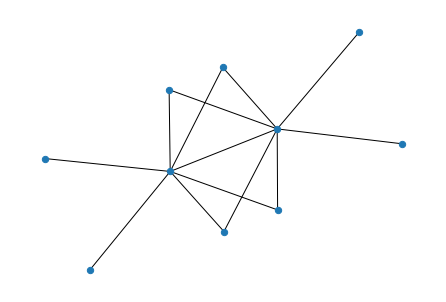

In [ ]:
g = LCFS(10,[7,6,5,4,3,2,1],2)
nx.draw(g,node_size=40)

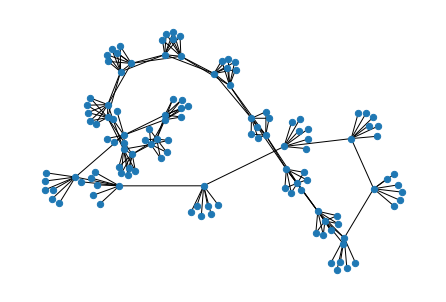

In [ ]:
g = LCFS(125,[7,6,5,4,3,2,1],28)
nx.draw(g,node_size=40)

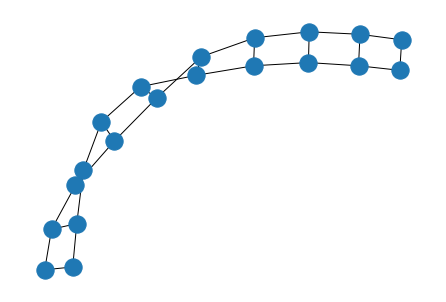

In [ ]:
g = LCFS(20,[1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,10,10,10,10,10,10,10,10,10,10,10],1)
nx.draw(g)

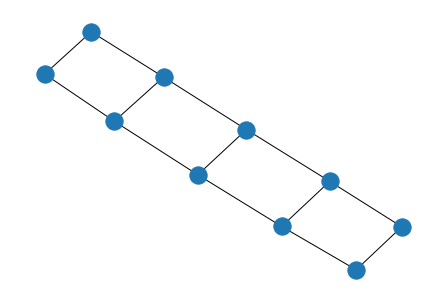

In [ ]:
N = 10
sequence = []
for i in range(2):
  subsequence = []
  subsequence.extend([1]*(N//2-1))
  subsequence.extend([0])
  sequence.extend(subsequence)

sequence.extend([N//2]*(N//2))

sequence = [int(item) for item in sequence]
g = LCFS(N,sequence,1)
nx.draw(g)

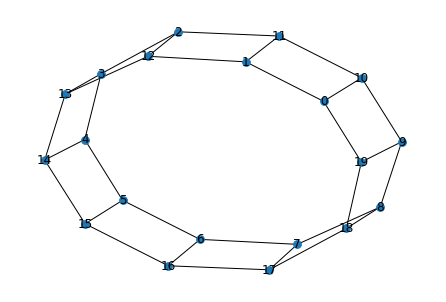

In [ ]:
g = LCFS(20,[1,11,1,1,1,1,1,1,1,1,1,-9,1,1,1,1,1,1,1,1,10,10,10,10,10,10,10,10,10,10,10],1)
nx.draw(g, node_size=60, with_labels=True)

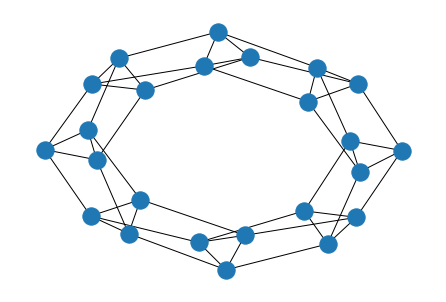

In [ ]:
N = 24

sequence = []
sequence.extend([1]*N)
sequence.extend([N//3]*N)

sequence = [int(item) for item in sequence]
g = LCFS(N,sequence,1)
nx.draw(g)


NameError: ignored

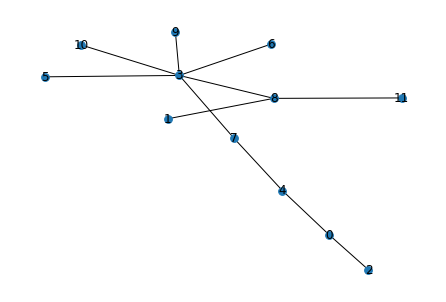

In [ ]:
g = nx.random_tree(12)
nx.draw(g, node_size=60, with_labels=True)

In [ ]:
for line in nx.generate_edgelist(g, data=False):
    print(line)

0 2
0 4
1 8
3 5
3 6
3 7
3 9
3 10
3 8
4 7
8 11


In [ ]:
import copy

In [ ]:
def GetLFCSfromGraph(graph):
  h = copy.deepcopy(graph)
  sequence = []
  counter = 0
  while len(h.edges) > 0:
    node = counter%len(h.nodes)
    neighbours = list(h.neighbors(node))
    if len(neighbours) > 0:
      sequence.append(neighbours[0]-node)
      h.remove_edge(node, neighbours[0])
    else:
      sequence.append(0)
    counter += 1
  return sequence



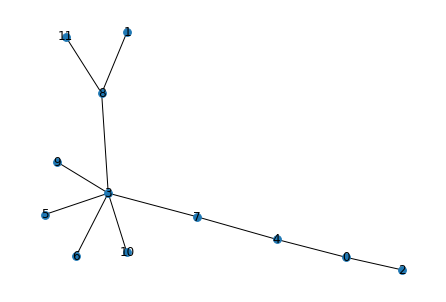

In [ ]:
hi = LCFS(12,sequence,1)
nx.draw(hi, node_size=60, with_labels=True)

In [ ]:
g = nx.icosahedral_graph()

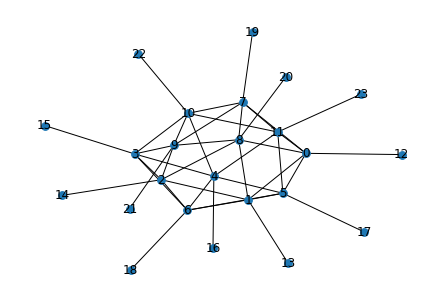

In [ ]:
for i in range(12):
  g.add_edge(i,i+12)
nx.draw(g, node_size=60, with_labels=True)

In [ ]:
print(GetLFCSfromGraph(g))

[1, 1, 1, 1, 1, -5, -5, -7, -8, -7, -7, -11, -12, -12, -12, -12, -12, -12, -12, -12, -12, -12, -12, -12, 0, 4, 4, 3, 2, 1, 0, 1, -7, -6, -6, -7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 2, 1, 1, -3, -4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


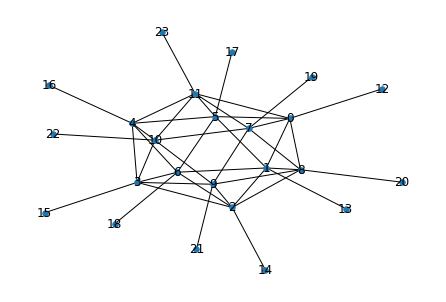

In [ ]:
nx.draw(G, nx.fruchterman_reingold_layout(G,iterations = 530),node_size=30,with_labels=True)

In [ ]:
#@title 3D Plot
layt = nx.spring_layout(g,iterations = 1350, dim=3)

#layt=g.layout('fr3d', dim=3)
N = g.number_of_nodes()
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in g.edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(50,125,250)', width=4),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='Articles',
               marker=dict(symbol='circle',
                             size=4,
                             color='rgb(50,110,250)',
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               #text=labels,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Graph",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest'
    ,paper_bgcolor='rgba(11,11,11,11)',
    plot_bgcolor='rgba(11,11,11,11)'    )

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)
fig.show()